### Import Libraries

In [48]:
from arcgis.gis import GIS

### Connect to organizations

In [ ]:
source = GIS(profile="web_gis_user")
target = GIS(profile="another_gis_user")

### Get application item

<Item title:"Allie Co-Worker Map" type:Web Mapping Application owner:web_gis_user>
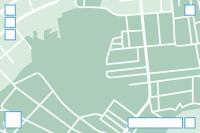

In [50]:
instant_app = source.content.get("3647f2630c16402b8c6fba91210a513a")
instant_app

### Inspect item properties

In [51]:
instant_app.type

'Web Mapping Application'

In [52]:
app_definition = instant_app.get_data()
app_definition

{'source': 'a3cbc26d59124dfd9b6b740937f37d10',
 'folderId': 'root',
 'values': {'webmap': '50bebdf6a4e2438a8fa6149012f337ff',
  'type': 'webmap',
  'searchConfiguration': {'allPlaceholder': 'Find address or place',
   'sources': [{'url': 'https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer',
     'singleLineFieldName': None,
     'name': 'ArcGIS World Geocoding Service',
     'placeholder': 'Find address or place',
     'maxResults': None,
     'maxSuggestions': None,
     'suggestionsEnabled': None,
     'minSuggestCharacters': None,
     'withinViewEnabled': False,
     'countryCode': None,
     'zoomScale': None},
    {'url': 'https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer',
     'singleLineFieldName': None,
     'name': 'ArcGIS World Geocoding Service',
     'placeholder': 'Find address or place',
     'maxResults': None,
     'maxSuggestions': None,
     'suggestionsEnabled': None,
     'minSuggestCharacters': None,
     'withinViewEnabled': Fa

<Item title:"Allie Co-Worker Map" type:Web Map owner:web_gis_user>
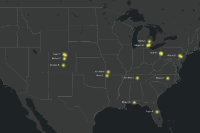

In [53]:
source.content.get(app_definition['values']['webmap'])

### Clone application

In [ ]:
try:
    if not [f.name for f in list(target.content.folders.list())][0]:
        target.content.folders.create(folder="instant_clone")
    clone_result = target.content.clone_items(items=[instant_app],
                                              folder="instant_clone")
    clone_result
except Exception as e:
    print(f"Cloning instant app {instant_app.title} failed.")
    print(f"{str(e)}")


In [55]:
clone_result

[<Item title:"Allie_CoworkerMap" type:Feature Layer Collection owner:another_gis_user>,
 <Item title:"Allie Co-Worker Map" type:Web Map owner:another_gis_user>,
 <Item title:"Allie Co-Worker Map" type:Web Mapping Application owner:another_gis_user>]

In [56]:
cloned_app = clone_result[2]

### Compare results

In [57]:
clone_app_definition = cloned_app.get_data()
clone_app_definition

{'source': 'a3cbc26d59124dfd9b6b740937f37d10',
 'folderId': 'e049330840364d4c9bfb3863198c5f28',
 'values': {'webmap': 'ae81f22bc7b84ea6bb5cd712321d062c',
  'type': 'webmap',
  'searchConfiguration': {'allPlaceholder': 'Find address or place',
   'sources': [{'url': 'https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer',
     'singleLineFieldName': None,
     'name': 'ArcGIS World Geocoding Service',
     'placeholder': 'Find address or place',
     'maxResults': None,
     'maxSuggestions': None,
     'suggestionsEnabled': None,
     'minSuggestCharacters': None,
     'withinViewEnabled': False,
     'countryCode': None,
     'zoomScale': None},
    {'url': 'https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer',
     'singleLineFieldName': None,
     'name': 'ArcGIS World Geocoding Service',
     'placeholder': 'Find address or place',
     'maxResults': None,
     'maxSuggestions': None,
     'suggestionsEnabled': None,
     'minSuggestCharacters': None,


<Item title:"Allie Co-Worker Map" type:Web Map owner:another_gis_user>
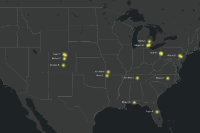

In [58]:
target.content.get(clone_app_definition['values']['webmap'])